In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_csv(r"C:\Users\HP\Desktop\dataset\11_chrun_prediction\customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5103,6421-SZVEM,Female,0,Yes,Yes,28,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,One year,Yes,Bank transfer (automatic),82.85,2320.8,No
6149,3069-SSVSN,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,One year,No,Mailed check,25.85,25.85,No
823,0295-QVKPB,Male,0,No,No,5,Yes,No,DSL,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),63.95,318.1,No
874,4713-ZBURT,Male,0,No,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),99.70,4634.35,No
729,2753-JMMCV,Male,0,No,No,65,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),74.20,4805.65,No


In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
517400/df.shape[0]

73.46301292063042

In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:

df.shape

(7043, 20)

In [11]:

df.iloc[488].TotalCharges


' '

In [12]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

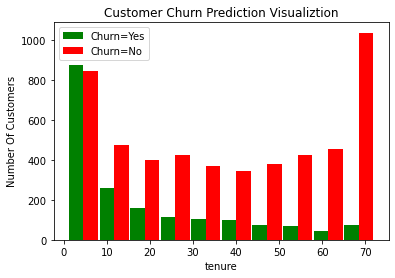

In [15]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

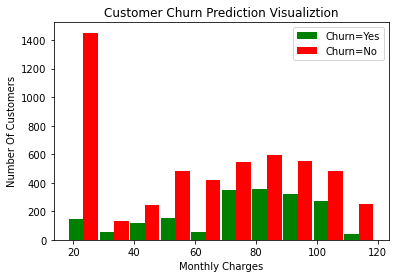

In [16]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [17]:

def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [18]:

print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:

df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [20]:

print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [22]:

for col in df1:
    print(f'{col}: {df1[col].unique()}')
    

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [23]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [24]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [25]:

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
348,1,0,0,0,23,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5468,1,0,0,0,7,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1238,1,1,0,0,16,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
915,0,1,1,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5898,1,0,1,1,33,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [27]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [28]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [29]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [30]:

X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [31]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [32]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [33]:
5163/1869

2.7624398073836276

In [34]:

y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [35]:
X_train.shape

(5625, 26)

In [36]:
X_test.shape

(1407, 26)

In [37]:

X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [38]:
len(X_train.columns)

26

# Build a model (ANN) in tensorflow/keras

In [39]:
from tensorflow_addons import losses

In [40]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report


In [41]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [42]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7040
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7942
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.7992
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8044
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8023
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8114
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8009
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.7922
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8106
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4077 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8318
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8310
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8346
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8393
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8441
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8375
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8190
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8284
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8516
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 

# Mitigating Skewdness of Data

In [43]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [44]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [45]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [46]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [47]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6705 - accuracy: 0.5793
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7386
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7457
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7716
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7608
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7684
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7608
Epoch 8/100
94/94 [==============================] - ETA: 0s - loss: 0.4673 - accuracy: 0.77 - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7763
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7654
Epoch 10/100
94/94 [==============================] - 0s 2ms/step -

94/94 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8136
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8316
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8136
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8269
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8111
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8091
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8071
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8106
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8210
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8194
Epoch 92/100


In [48]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [49]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [50]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [51]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 0.6063 - accuracy: 0.6714
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7695
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7734
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7789
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4735 - accuracy: 0.7740
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4651 - accuracy: 0.7849
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7744
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7765
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.7837
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4618 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3718 - accuracy: 0.8344
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3764 - accuracy: 0.8317
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3633 - accuracy: 0.8389
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8398
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3707 - accuracy: 0.8333
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8281
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8389
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8423
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3684 - accuracy: 0.8362
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 

# Method3: SMOTE

In [52]:

X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [54]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.19041-SP0
Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
NumPy 1.19.2
SciPy 1.5.2
Scikit-Learn 0.24.1


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [57]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [59]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 606us/step - loss: 0.5864 - accuracy: 0.6885
Epoch 2/100
176/176 [==============================] - 0s 691us/step - loss: 0.4429 - accuracy: 0.7831
Epoch 3/100
176/176 [==============================] - 0s 617us/step - loss: 0.4238 - accuracy: 0.7902
Epoch 4/100
176/176 [==============================] - 0s 591us/step - loss: 0.4205 - accuracy: 0.8009
Epoch 5/100
176/176 [==============================] - 0s 616us/step - loss: 0.4212 - accuracy: 0.7960
Epoch 6/100
176/176 [==============================] - 0s 600us/step - loss: 0.4085 - accuracy: 0.8098
Epoch 7/100
176/176 [==============================] - 0s 668us/step - loss: 0.4060 - accuracy: 0.8110
Epoch 8/100
176/176 [==============================] - 0s 690us/step - loss: 0.4116 - accuracy: 0.8031
Epoch 9/100
176/176 [==============================] - 0s 658us/step - loss: 0.4231 - accuracy: 0.7898
Epoch 10/100
176/176 [==============================] - 0s 772us/step - l

176/176 [==============================] - 0s 964us/step - loss: 0.3583 - accuracy: 0.8331
Epoch 80/100
176/176 [==============================] - 0s 852us/step - loss: 0.3412 - accuracy: 0.8471
Epoch 81/100
176/176 [==============================] - 0s 708us/step - loss: 0.3575 - accuracy: 0.8333
Epoch 82/100
176/176 [==============================] - 0s 768us/step - loss: 0.3562 - accuracy: 0.8322
Epoch 83/100
176/176 [==============================] - 0s 664us/step - loss: 0.3497 - accuracy: 0.8303
Epoch 84/100
176/176 [==============================] - 0s 750us/step - loss: 0.3577 - accuracy: 0.8289
Epoch 85/100
176/176 [==============================] - 0s 678us/step - loss: 0.3509 - accuracy: 0.8344
Epoch 86/100
176/176 [==============================] - 0s 601us/step - loss: 0.3551 - accuracy: 0.8321
Epoch 87/100
176/176 [==============================] - 0s 599us/step - loss: 0.3414 - accuracy: 0.8412
Epoch 88/100
176/176 [==============================] - 0s 803us/step - loss:

# Method4: Use of Ensemble with undersampling

In [60]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [63]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [65]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [67]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [68]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [69]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [70]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 656us/step - loss: 0.6833 - accuracy: 0.5657
Epoch 2/100
94/94 [==============================] - 0s 612us/step - loss: 0.5577 - accuracy: 0.7431
Epoch 3/100
94/94 [==============================] - 0s 651us/step - loss: 0.5040 - accuracy: 0.7623
Epoch 4/100
94/94 [==============================] - 0s 666us/step - loss: 0.4885 - accuracy: 0.7616
Epoch 5/100
94/94 [==============================] - 0s 904us/step - loss: 0.4978 - accuracy: 0.7590
Epoch 6/100
94/94 [==============================] - 0s 699us/step - loss: 0.4959 - accuracy: 0.7611
Epoch 7/100
94/94 [==============================] - 0s 717us/step - loss: 0.4799 - accuracy: 0.7743
Epoch 8/100
94/94 [==============================] - 0s 691us/step - loss: 0.4781 - accuracy: 0.7752
Epoch 9/100
94/94 [==============================] - 0s 739us/step - loss: 0.4669 - accuracy: 0.7803
Epoch 10/100
94/94 [==============================] - 0s 686us/step - loss: 0.4606 - accura

94/94 [==============================] - 0s 685us/step - loss: 0.3858 - accuracy: 0.8221
Epoch 82/100
94/94 [==============================] - 0s 647us/step - loss: 0.3883 - accuracy: 0.8253
Epoch 83/100
94/94 [==============================] - 0s 613us/step - loss: 0.3946 - accuracy: 0.8180
Epoch 84/100
94/94 [==============================] - 0s 655us/step - loss: 0.3892 - accuracy: 0.8280
Epoch 85/100
94/94 [==============================] - 0s 633us/step - loss: 0.3993 - accuracy: 0.8153
Epoch 86/100
94/94 [==============================] - 0s 601us/step - loss: 0.3801 - accuracy: 0.8312
Epoch 87/100
94/94 [==============================] - 0s 633us/step - loss: 0.3802 - accuracy: 0.8271
Epoch 88/100
94/94 [==============================] - 0s 682us/step - loss: 0.3974 - accuracy: 0.8181
Epoch 89/100
94/94 [==============================] - 0s 615us/step - loss: 0.3763 - accuracy: 0.8321
Epoch 90/100
94/94 [==============================] - 0s 623us/step - loss: 0.3757 - accuracy: 

In [71]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 644us/step - loss: 0.6900 - accuracy: 0.5612
Epoch 2/100
94/94 [==============================] - 0s 654us/step - loss: 0.5506 - accuracy: 0.7375
Epoch 3/100
94/94 [==============================] - 0s 670us/step - loss: 0.5101 - accuracy: 0.7697
Epoch 4/100
94/94 [==============================] - 0s 676us/step - loss: 0.4814 - accuracy: 0.7756
Epoch 5/100
94/94 [==============================] - 0s 677us/step - loss: 0.4832 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 688us/step - loss: 0.4810 - accuracy: 0.7630
Epoch 7/100
94/94 [==============================] - 0s 689us/step - loss: 0.4827 - accuracy: 0.7676
Epoch 8/100
94/94 [==============================] - 0s 815us/step - loss: 0.4694 - accuracy: 0.7700
Epoch 9/100
94/94 [==============================] - 0s 751us/step - loss: 0.4808 - accuracy: 0.7549
Epoch 10/100
94/94 [==============================] - 0s 690us/step - loss: 0.4653 - accura

94/94 [==============================] - 0s 667us/step - loss: 0.3775 - accuracy: 0.8296
Epoch 82/100
94/94 [==============================] - 0s 847us/step - loss: 0.3629 - accuracy: 0.8308
Epoch 83/100
94/94 [==============================] - 0s 861us/step - loss: 0.3693 - accuracy: 0.8282
Epoch 84/100
94/94 [==============================] - 0s 814us/step - loss: 0.3831 - accuracy: 0.8205
Epoch 85/100
94/94 [==============================] - 0s 633us/step - loss: 0.3665 - accuracy: 0.8299
Epoch 86/100
94/94 [==============================] - 0s 612us/step - loss: 0.3688 - accuracy: 0.8266
Epoch 87/100
94/94 [==============================] - 0s 882us/step - loss: 0.3757 - accuracy: 0.8200
Epoch 88/100
94/94 [==============================] - 0s 907us/step - loss: 0.3697 - accuracy: 0.8192
Epoch 89/100
94/94 [==============================] - 0s 796us/step - loss: 0.3600 - accuracy: 0.8246
Epoch 90/100
94/94 [==============================] - 0s 677us/step - loss: 0.3930 - accuracy: 

In [72]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 758us/step - loss: 0.6456 - accuracy: 0.6412
Epoch 2/100
83/83 [==============================] - 0s 633us/step - loss: 0.5324 - accuracy: 0.7439
Epoch 3/100
83/83 [==============================] - 0s 633us/step - loss: 0.5122 - accuracy: 0.7473
Epoch 4/100
83/83 [==============================] - 0s 707us/step - loss: 0.4880 - accuracy: 0.7734
Epoch 5/100
83/83 [==============================] - 0s 666us/step - loss: 0.4721 - accuracy: 0.7815
Epoch 6/100
83/83 [==============================] - 0s 710us/step - loss: 0.4834 - accuracy: 0.7705
Epoch 7/100
83/83 [==============================] - 0s 745us/step - loss: 0.4711 - accuracy: 0.7808
Epoch 8/100
83/83 [==============================] - 0s 780us/step - loss: 0.4550 - accuracy: 0.7866
Epoch 9/100
83/83 [==============================] - 0s 738us/step - loss: 0.4564 - accuracy: 0.7868
Epoch 10/100
83/83 [==============================] - 0s 780us/step - loss: 0.4716 - accura

83/83 [==============================] - 0s 759us/step - loss: 0.3970 - accuracy: 0.8193
Epoch 82/100
83/83 [==============================] - 0s 879us/step - loss: 0.3975 - accuracy: 0.8282
Epoch 83/100
83/83 [==============================] - 0s 696us/step - loss: 0.4055 - accuracy: 0.8081
Epoch 84/100
83/83 [==============================] - 0s 635us/step - loss: 0.3841 - accuracy: 0.8225
Epoch 85/100
83/83 [==============================] - 0s 588us/step - loss: 0.3686 - accuracy: 0.8390
Epoch 86/100
83/83 [==============================] - 0s 658us/step - loss: 0.3894 - accuracy: 0.8258
Epoch 87/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8200
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8257
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8168
Epoch 90/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3934 - accuracy: 0.8202
E

In [73]:
len(y_pred1)

1407

In [74]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [75]:

cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.65      0.75      1033
           1       0.45      0.81      0.58       374

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.78      0.69      0.71      1407

